### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.ion()
%matplotlib inline
%config InlineBackend.figure_format='retina'

#### Local Imports

In [4]:
# Paths
from chestxray.config import (PANDA_PATH,
                              MODEL_PATH,
                              PANDA_IMGS,
                              PANDA_MASKS,
                              TRAIN_CSV)

# Viz
from chestxray.visualize import show_from_ids, imshow, reverse_show_img

### Load Data

In [5]:
TRAIN_DF = pd.read_csv(TRAIN_CSV)
TRAIN_DF.head()

,image_id,data_provider,isup_grade,gleason_score
0,0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
1,000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0
2,0018ae58b01bdadc8e347995b69f99aa,radboud,4,4+4
3,001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4+4
4,001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0+0


In [6]:
suspicious = pd.read_csv(PANDA_PATH/"PANDA_Suspicious_Slides.csv")

In [7]:
suspicious.head()

,image_id,reason
0,1866ab99cc028bbb8ed656f1181215f1,marks
1,3ad48056423f5a0710d13d943f112fe1,marks
2,eb62229279cd8ab73c9ca81171f14762,marks
3,ebc0cf09e9f77d222af0b8015c409a01,marks
4,d6b1c8ca6037b5ddca5d2086975a643b,marks


In [8]:
suspicious.reason.unique()

array(['marks', 'No Mask', 'Background only',
       'No cancerous tissue but ISUP Grade > 0', 'tiss', 'blank'],
      dtype=object)

### Visualize

In [83]:
marks_ids = suspicious.loc[suspicious.reason == "marks", "image_id"]

In [84]:
len(marks_ids)

475

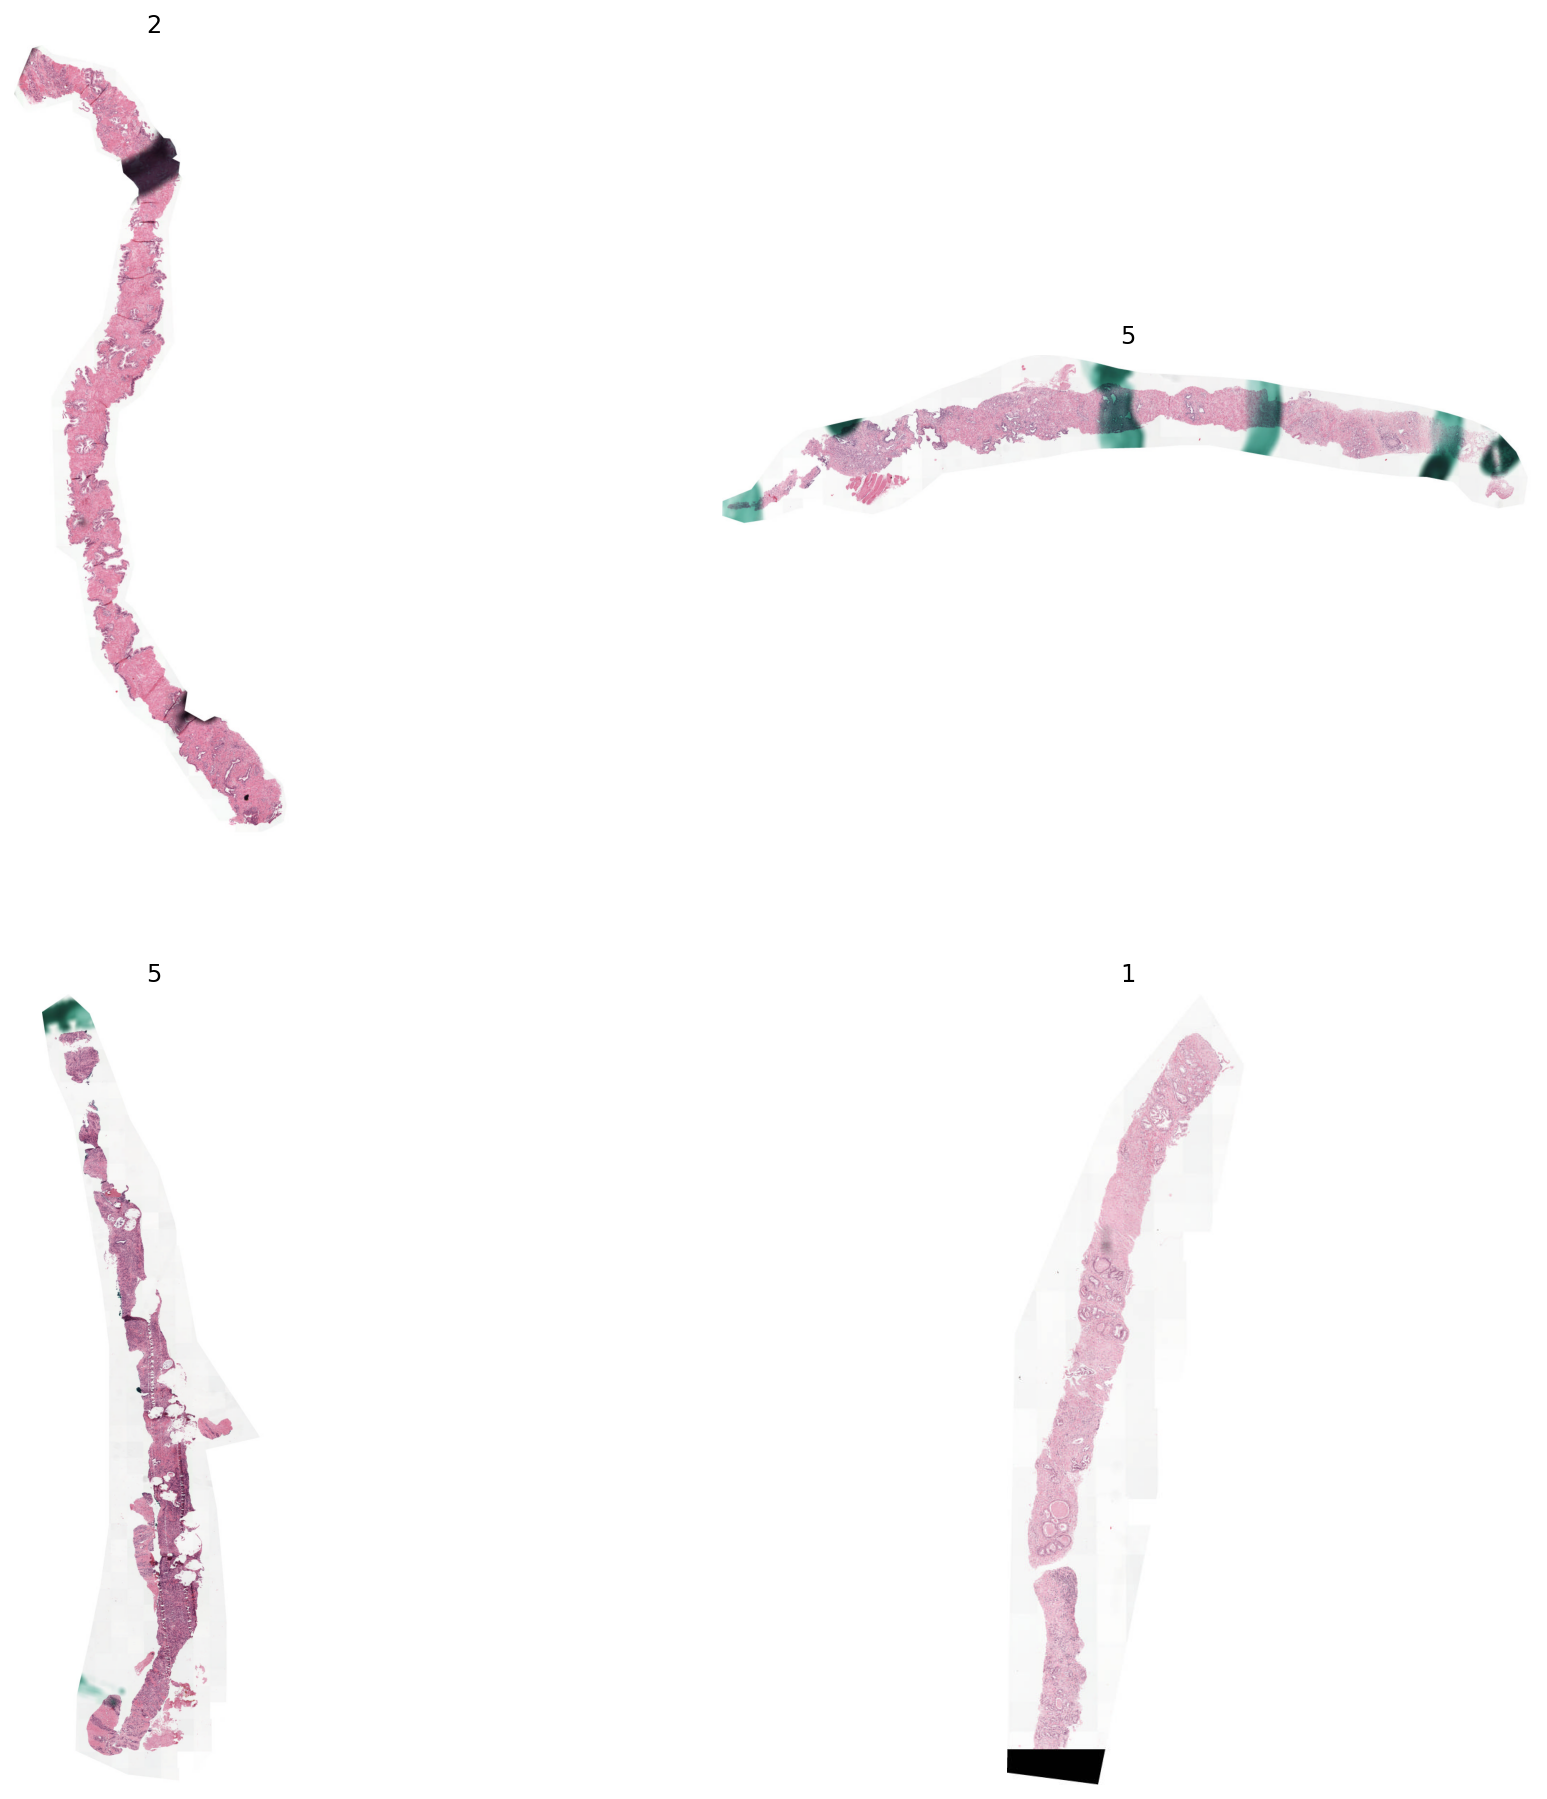

In [87]:
sample = marks_ids.sample(4)
show_from_ids(sample, TRAIN_DF)

In [88]:
sample

367    3f5ace05ae2e2cee322fdee09da53f0a
58     bc11ea87ebca072c04df741c44aeafb6
26     7fbd12db8dceaec4f97268f44853fc57
255    45b107368018ae2d6174aa5c1c6aa29c
Name: image_id, dtype: object

To delete:
- marks (probaly all, to easy to overfit)
- empty (3790f55cad63053e956fb73027179707)